# NOTEBOOK 2: Basic statistics

In this notebook we will show you how to do basic statistic analysis on a large dataset. We will start using an example dataset, which will be our main focus throughout the rest of the upcoming notebooks, this is the "wine quality dataset", it's available online and it can be used to predict the quality of wine based on a number of chemical and physical properties. 
First we will show you how to import the dataset, then we will show how to do basic statistical and graphical descriptions, and lastly, we are going to do some hypothesis testing, such as T-test, and ANOVA.

## Table of Contents

---
* [Importing the DataSet](#Import_DataSet)
  * [Importing from a file stored in Google Drive](##Importing_from_a_file_stored_on_Google_Drive)
  * [Importing from a file stored in the Web](##Importing_from_a_file_stored_on_the_Web)
  * [Importing modules that are not present on Google Collab](##Importing_modules_that_are_not_present_on_Google_Collab)

Armaan: Since were in a git-codespace, we don't need to import the dataset. Removed google drive cells.

* [Statistical Description of Data](#Statistical_Description_of_Data)
* [Graphical Description of Data](#Graphical_Description_of_Data)
* [Hypothesis Testing](#Hypothesis_Testing)
  * [T-Test One sample (against "True Value")](##T-Test_One_sample_(against_"True_Value"))
  * [T-Test Two Sample Comparison](##T-Test_Two_Sample_Comparison)
  * [Equality of Variances (Homoscedasticity)](##Equality_of_Variances_(Homoscedasticity))
  * [ANOVA](##ANOVA)


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df2=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")

##Importing modules that are not present on Google Collab
We can always add new modules because we are literally using a computer borrowed from Google with a linux python 3 distribution.
Using the **"!"** sign we can run any command as if we were using a command line console, in this case (jupyter notebooks) we use a special python-simplified command-line console called "IPython".
In this example we will install a statistics Library called **Pinguoin**. The python command **"pip install"** will be used for downloading and installing foreign libraries into our borrowed computer.  For more information, please visit the [documentation](https://pingouin-stats.org/ "Pingouin").

In [6]:
!pip install pingouin

#Statistical Description of Data
---


The Pandas Library has some functions that allow a quick statistical description of a dataset. For more information, please visit the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html "DataFrame API Reference").

We will first try some basic methods. 

We are going to explore **info()**, **head()** and **tail()**.

**df.info()** prints information about a DataFrame including the index dtype,  name of the columns, non-null values and memory usage. It is useful for quickly testing if your object has the right type of data in it.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**df.head()** returns the first n rows. In this case n = 6. It can be used to make a quick scan of the data. We could also use **df.tail()** to print the last n rows.

In [8]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Useful methods for statistical description.

**max()** is a method that shows the maximum value of a column or row by specifying the "axis" parameter (0 or 1).

In [9]:
df['pH'].max()

4.01

In [10]:
df.max(axis=0)

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

The same logic is applied for **min()**, **mean()**, **median()** and **std()**. These methods are used for calculating the minimum, mean, median and standard deviation.

There is a handy method to describe a dataframe data. **df.describe()** is used to view some basic statistical details like percentile, mean, standar deviation, minimum value, 25%, 50%, 75% and maximum value.

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Pandas allows more advanced analysis when combined with other methods, such as **groupby()**. Let's use this method to describe the alcohol content for different quality wines.

In [12]:
df.groupby(["quality"])[["alcohol"]].describe()

alcohol                                                        
          count       mean       std  min     25%     50%     75%   max
quality                                                                
3          10.0   9.955000  0.818009  8.4   9.725   9.925  10.575  11.0
4          53.0  10.265094  0.934776  9.0   9.600  10.000  11.000  13.1
5         681.0   9.899706  0.736521  8.5   9.400   9.700  10.200  14.9
6         638.0  10.629519  1.049639  8.4   9.800  10.500  11.300  14.0
7         199.0  11.465913  0.961933  9.2  10.800  11.500  12.100  14.0
8          18.0  12.094444  1.224011  9.8  11.325  12.150  12.875  14.0

#Confidence interval
---

Now, let's calculate a confidence interval (CI). In this case, we want to calculate the CI at 95% for the mean of the alcohol content on wines with a quality value of 3. Let's remember the formula for the confidence interval: 

$CI= mean \pm z*SE$

where z is the z-value and SE is the standard error.
The z-value, when calculating a confidence interval, is the value of the z (normal distribution) statistic for a certain confidence level. Common values of z for different cofidence intervals are:

>Confidence Level | Z-Value
>--- | ---
>90% | 1.645
>95% | 1.96
>99% | 2.575

The SE is the standard error of the mean. It indicates the uncertainty around the estimate of the mean.:

$SE = \frac{SD}{\sqrt{n}}$

where n is the sample size

We will use the **numpy** library for calculating this confidence interval, for more information visit the [numpy documentation](https://numpy.org/doc/stable/index.html "NumPy v1.19 Manual"). 

Let's define the neccesary variables in order to calculate the C.I: 

In [13]:
import numpy as np
df_quality3_alcohol=df[df['quality'] == 3]['alcohol']
mean = np.mean(df_quality3_alcohol)
N = np.size(df_quality3_alcohol)
SD = np.std(df_quality3_alcohol)
SE = SD /np.sqrt(N)

print("mean: %.2f N: %.2f Standard Error: %.2f" % (mean, N, SE))

mean: 9.96 N: 10.00 Standard Error: 0.25


Now let's calculate the lower and upper limits of the confidence interval using the previous formula:

In [14]:
lower_limit= mean-1.96*SE
upper_limit=mean+1.96*SE

print("lower limit: \t%.2f \nmean: \t\t%.2f \nupper limit: \t%.2f" % (lower_limit, mean, upper_limit))

lower limit: 	9.47 
mean: 		9.96 
upper limit: 	10.44


The **print()** function allows customization of the output. In the previous examples, we use **\t** and **\n** for applying tab and end of line, respectively. Also, using **%.2f** on the result formats it in order to only show 2 decimals. For more information visit the [documentation](https://docs.python.org/3/tutorial/inputoutput.html "Python's Input and Output").


#Graphical Description of Data
---

Now we will explore some basic plots that are useful for graphical description of the data.

Histograms represent the data distribution by chopping the data in bins and then making bars proportional to the number of observations on each bin.




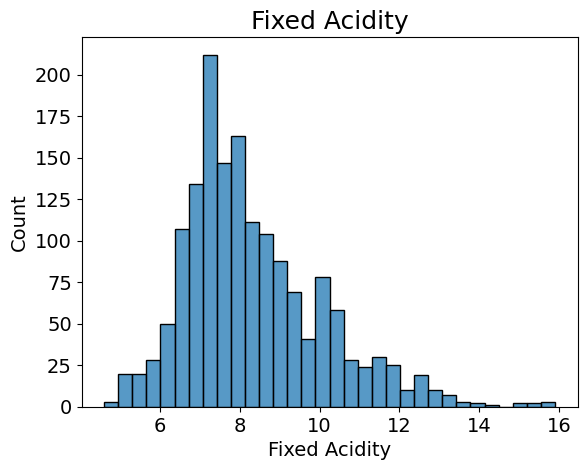

In [15]:
hist=sns.histplot(x="fixed acidity", data = df,)
hist.axes.set_title("Fixed Acidity",fontsize=18)
hist.set_xlabel("Fixed Acidity",fontsize=14)
hist.set_ylabel("Count",fontsize=14)
hist.tick_params(labelsize=14)

Another way to represent this data is using the boxplot. This plot is a graphical summarization of the data. It shows the minimum, maximum, median, first quartile and third quartile. 



<Axes: xlabel='fixed acidity'>

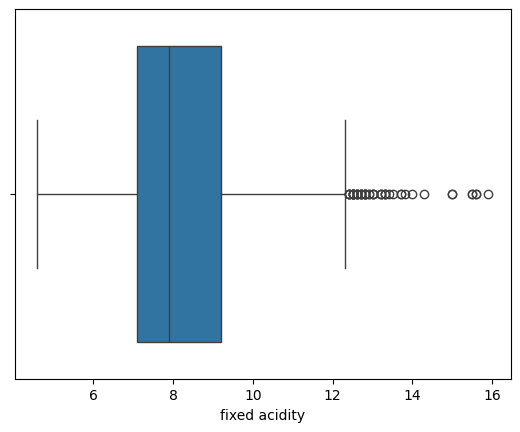

In [16]:
sns.boxplot(x='fixed acidity', data = df)

The violin plot combines the functionality of showing the quartiles of the distribution (box plot) and the distribution of a numeric variable (kernel density estimation).

<Axes: xlabel='fixed acidity'>

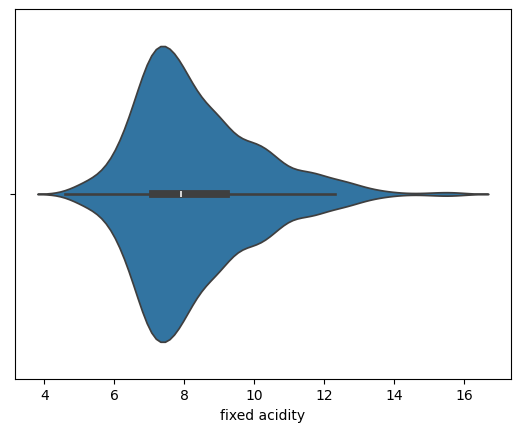

In [17]:
sns.violinplot(x = 'fixed acidity', data = df)

# Hypothesis Testing
---

When comparing two samples (or analytical methods) it's important to analyze if their means and/or variances are equal. In order to decide if the difference in their means and variances can be accounted to random variations, a statistical test can be used. These tests are also known as *significance tests*.

We are going to use the **Pingouin** library due to its simplicity and integration with **Pandas**. For more information, please visit the [documentation](https://pingouin-stats.org/index.html "Pingouin").

In [18]:
!pip install pingouin
import pingouin as pg
import pandas as pd
import seaborn as sns
import numpy as np

We will analyze the distributions of fixed acidity and alcohol content for red and white wines, and for this purpose we will make two DataFrames. The first one is a DataFrame for the fixed acidity with its corresponding boxplot.

In [19]:
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")

#DataFrame consisting only of fixed acidities:
df_fa = pd.concat([df_red["fixed acidity"],df_white["fixed acidity"]], ignore_index=True, axis=1)
df_fa.columns = ['red', 'white']
df_fa

,red,white
0,7.4,7.0
1,7.8,6.3
2,7.8,8.1
3,11.2,7.2
4,7.4,7.2
...,...,...
4893,NaN,6.2
4894,NaN,6.6
4895,NaN,6.5
4896,NaN,5.5


<Axes: >

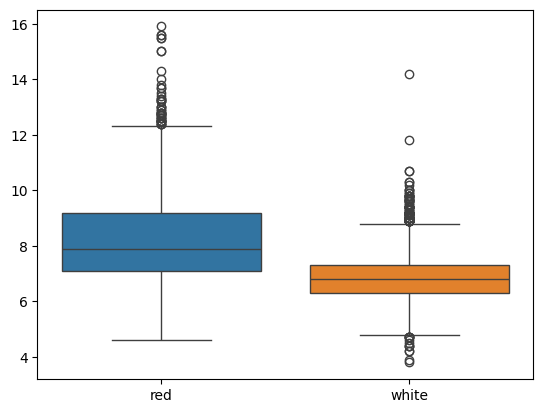

In [20]:
sns.boxplot(data = df_fa)

Now, let's make the second dataframe for alcohol content and its boxplot.

      red  white
0     9.4    8.8
1     9.8    9.5
2     9.8   10.1
3     9.8    9.9
4     9.4    9.9
...   ...    ...
4893  NaN   11.2
4894  NaN    9.6
4895  NaN    9.4
4896  NaN   12.8
4897  NaN   11.8

[4898 rows x 2 columns]


<Axes: >

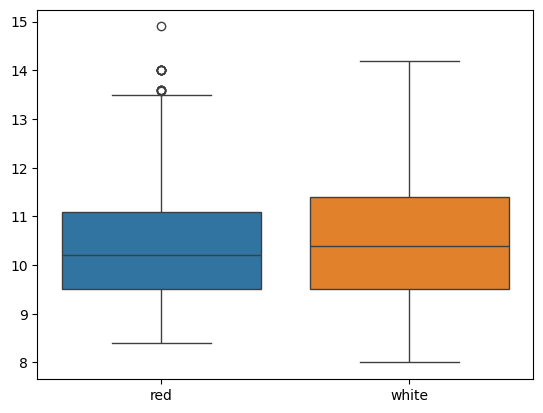

In [21]:
df_al = pd.concat([df_red["alcohol"],df_white["alcohol"]], ignore_index=True, axis=1)
df_al.columns = ['red', 'white']
print(df_al)
sns.boxplot(data = df_al)

We notice that the distribution of alcohol content is very similar for red and white wines, while the distribution of fixed acidity is significantly different. Let's see if we can statistically demonstrate this observation.

##Student's t-test

The Student's t-test is used to compare the mean of one or two normally distributed populations, preferably of equal size and variance by proposing an estimator of the likelihood of a *Null Hypothesis*. A distribution area related value called the "p-value" is then calculated. A very small **p-value** implies that *Null Hypothesis* is very unlikely. The usual criteria is to use a critical value of 0.05 for symmetrical distributions called the "level of significance"; if the calculated p-value is less than 0.05, then we conclude that the *Null Hypothesis* is very unlikely to be true.

This test has 2 commonly used variants:

*   A **one-sample** test, if the mean of the data has a specified "true" value.
*   A **two-sample** test if the means of both populations are equal. (Assuming the variances of both populations are equal)

these topics are covered in various statistics books, such as [this one](https://openstax.org/books/statistics/pages/9-introduction "Introductory Statistics").

### One sample t-test
In a one-sample t-test we want to test the null hypothesis that the population mean $\overline{x}$ is equal to a specified value $\mu_{0} $

First we will determine the mean of the fixed acidity in our dataset.


In [22]:
print(df_fa.mean())

red      8.319637
white    6.854788
dtype: float64


Now that we know that the mean ($\overline{x}$) for red wine is 8.31, we will compare it to the "true value" of 8.33 (that might have come from the certificate of analysis of a standard reference material for example).

In [23]:
test1=pg.ttest(df_fa['red'],8.33)
test1

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.237999,1598,two-sided,0.811912,"[8.23, 8.41]",0.005952,0.029,0.056506


As seen by the **p-value**  (p-val= 0.81) the distribution mean *could* be 8.33. Let's perform the test again using a "true" white wine mean of 6.85.

In [24]:
test2=pg.ttest(df_fa['red'],6.85)
test2

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,33.752939,1598,two-sided,5.398298e-189,"[8.23, 8.41]",0.844087,8.726e+184,1.0


In this case, the **p-value** is 5.39e-189. This means it is not probable that 6.85 is the $\mu_{0}$ of the fixed acidity content for red wine.

### Two-sample t-test
We can directly compare the fixed acidity values for both kinds of wine by using a two independent sample t-test (since the wines we are analyzing are independent). The independence of the samples is indicated with the parameter *paired=False*.

The **correction** parameter is used when both populations have different sample sizes, by setting it to "auto", it will automatically apply a correction when the sample sizes are unequal. This correction uses an equation called Welch-Satterthwaite's equation, that implies making complicated calculations involving the standard deviations. 


In [25]:
 df_fa["white"].dropna()

0       7.0
1       6.3
2       8.1
3       7.2
4       7.2
       ... 
4893    6.2
4894    6.6
4895    6.5
4896    5.5
4897    6.0
Name: white, Length: 4898, dtype: float64

In [26]:
print(df_fa.mean())
test3=pg.ttest(df_fa['red'],df_fa['white'], paired=False,correction='auto')
test3

red      8.319637
white    6.854788
dtype: float64


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,32.422711,1848.947934,two-sided,5.668161e-183,"[1.38, 1.55]",1.293371,4.834e+209,1.0


This result is quite similar to the one sample test where we tested the mean value of 6.85. 

Finaly, we can compare the alcohol content: 


In [27]:
print(df_al.mean())
test4=pg.ttest(df_al['red'],df_al['white'], correction='auto')
test4

red      10.422983
white    10.514267
dtype: float64


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.859029,3100.474621,two-sided,0.004278,"[-0.15, -0.03]",0.076571,1.903,0.757462


As the **p-value** is less than 0.05, we can say the difference in alcohol content is statistically significant. This points to a strong evidence against the null hypothesis, meaning we can safely say that both populations are different.

Upon inspection, we can see that the value for the degrees of freedom (DOF) is a decimal number. Given that the degrees of freedom should be (N-1), N being the sample size, one would expect N to be a whole number. As the sample size for red wine is smaller than the one for white wine (1599 vs 4898), the pingouin library estimated the DOF using the Welch–Satterthwaite equation. That's also why the DOF differs for "alcohol" and "fixed acidity", in both the sample size is the same but they have different standard deviations. If we use the parameter correction="auto" pengouin will use the W.S equation even if the sample size is the same for each column.

In case we needed to compare the results of a certain treatment on a material system or population (where the two groups of measure would be **dependent**), the correct way to perform a two sample t-test would be to indicate that the samples are dependent; this is usually called a **paired t-test**.

## Equality of Variances (Homoscedasticity)
A common assumption for many tests is that the variance for the different sets must be the same.
So it's always handy to have a tool that can check this assumption before processing.
You must have heard of the **F-test**. It's the simplest test for this job, however there are many more robust and powerful tests, and Pingouin doesn't offer an F-test function in his repertory.
However another common test is **Levene's test**, which is more robust regarding lack of normality and more suitable on many situations (W statistic that follows an F distribution).
Pingouin also offers another common test called **Bartlett's test**.
You can read more about these tests on the following links:
* https://en.wikipedia.org/wiki/F-test
* https://en.wikipedia.org/wiki/Levene%27s_test
* https://en.wikipedia.org/wiki/Bartlett%27s_test

Let's calculate the variances for the alcohol content and the quality for the red wine and white wine sets respectively:

In [28]:
print('SD of "alcohol content": \n',df_al.std())

SD of "alcohol content": 
 red      1.065668
white    1.230621
dtype: float64


The homscedasticity method needs a special syntax, we must enter a list of both sets as parameters, or a dataframe that includes both sets. Here we could not use df_al directly because the white wine dataset has less data points than the one for red wine, and the "extra" values of the red wine dataset will be stated as "NaN" values by pandas. It is worth noting that Pingouin does not support missing values (NaN), so we have no choice but to convert the red and white alcohol data to a list. We will use the "`to.numpy()`" method for this purpose, converting the data into a "**numpy array**" which is a kind of iterable list that pingouin does support.

In [29]:
test5=pg.homoscedasticity(data=[df_red["alcohol"].to_numpy(),df_white["alcohol"].to_numpy()], alpha=0.05)
test5

,W,pval,equal_var
levene,72.784614,1.780219e-17,False


As we can see by the result of the test, variances of alcohol content are not equal in both datasets.

## ANOVA
ANOVA is a widely used test when we want to compare multiple samples. By using ANOVA, we are checking if all the means of the selected groups are equal. If two groups have different means (even if the others are equal) the test will reject the null hypothesis, and that translates into a low p-value, so one must be careful when applying ANOVA.
ANOVA needs an "independent variable", usually a categorical variable like a sample code, and a dependent variable that could be for example some quantity of this sample. So, the different groups that ANOVA will compare will be: sample1-quantity mean, sample2-quantity mean, sample3-quantity mean, and so on.
In this case, we will use the wine dataset again. We can use the "quality" column as the independent variable which only has a few possible values (from 3 to 10). Then we can compare the residual sugar feature or the alcohol content.

In short, we will compare the 'residual sugar' mean of those wines with a 'quality' value of 4 with the residual sugar mean of the ones with a 'quality' value of 5, and so on.

ANOVA uses F-tests; according to the variance of each group (inside), and the variance between the groups (ordered by the independent variable), it will calculate an F-statistic and a p-value (two-tailed test). For example, if the variance of each group is small (meaning that we know the mean precisely), and the variance of all groups is large, that would indicate that the means of the different groups must be different.
Pingouin has a direct method for pandas data frames to automatically calculate an ANOVA:

In [30]:
df_red.anova(dv="residual sugar", between="quality") #dv means dependent variable, between='quality means that 'quality' is our independt (categorical) variable.

,Source,ddof1,ddof2,F,p-unc,np2
0,quality,5,1593,1.053374,0.384619,0.003295


We could safely conclude from this analysis, given the high 

*   List item
*   List item

p-value (>0.05, here stated as "p-unc"), that the residual sugar will be the same regardless of the quality of the wine (or at least the mean of all the wines that were analysed).

Let's analyse another variable, like the alcohol content, and let's see if we arrive to a different conclusion: 

In [31]:
df_red.anova(dv="alcohol", between="quality")

,Source,ddof1,ddof2,F,p-unc,np2
0,quality,5,1593,115.854797,1.209895e-104,0.266667


A we can see, the P-value is too low, so we can say for sure that *at least* two values of alcohol content of wines of different qualities are indeed different.

Using Pandas we could also summarize all the means for the different qualities fairly easily using the "groupby" method

In [32]:
df_red.groupby(["quality"])["residual sugar"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,2.635000,1.401596,1.2,1.875,2.1,3.10,5.7
4,53.0,2.694340,1.789436,1.3,1.900,2.1,2.80,12.9
5,681.0,2.528855,1.359753,1.2,1.900,2.2,2.60,15.5
6,638.0,2.477194,1.441576,0.9,1.900,2.2,2.50,15.4
7,199.0,2.720603,1.371509,1.2,2.000,2.3,2.75,8.9
8,18.0,2.577778,1.295038,1.4,1.800,2.1,2.60,6.4


In [33]:
df_red.groupby(["quality"])["alcohol"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,9.955000,0.818009,8.4,9.725,9.925,10.575,11.0
4,53.0,10.265094,0.934776,9.0,9.600,10.000,11.000,13.1
5,681.0,9.899706,0.736521,8.5,9.400,9.700,10.200,14.9
6,638.0,10.629519,1.049639,8.4,9.800,10.500,11.300,14.0
7,199.0,11.465913,0.961933,9.2,10.800,11.500,12.100,14.0
8,18.0,12.094444,1.224011,9.8,11.325,12.150,12.875,14.0
